# Proyek Analisis Data: Air Quality Dataset Dongsi Station
- **Nama:** Pepri Andika
- **Email:** pepriandika@gmail.com
- **ID Dicoding:** pepriandika

## Menentukan Pertanyaan Bisnis

- Bagaimana tren polusi udara sepanjang tahun?
- Bagaimana pengaruh arah angin terhadap penyebaran polutan?
- Kapan waktu paling aman untuk aktivitas luar ruangan berdasarkan tingkat polusi udara?
- Bagaimana pengaruh curah hujan terhadap tingkat polusi udara?

## Import Semua Packages/Library yang Digunakan

In [80]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [81]:
df = pd.read_csv("data/PRSA_Data_Dongsi_20130301-20170228.csv")
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


**Insight:**
- Ini adalah data hasil pengujian kualitas udara di stasiun Dongsi
- Ada beberapa nilai NaN di kolom SO2, NO2, dan O3.
- Data tanggal terlihat terpisah yang mungkin bisa disatukan


### Assessing Data

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight:**
- terdapat kolom No yang tidak diperlukan karena pandas punya indexnya sendiri
- kolom year month day hour bisa di satukan dengan tipedata datetime

In [83]:
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

**Insight:**
- Data Polusi Udara Banyak yang Hilang
- Data Stasiun dan Waktu Lengkap
- Data Cuaca Relatif Lengkap, Tapi Ada Beberapa Missing

In [84]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


**Insight**
- Tidak Ada data duplikasi

In [85]:
missing_percentage = df.isna().sum() / len(df) * 100
print(missing_percentage)

No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.138946
PM10       1.577116
SO2        1.890828
NO2        4.565937
CO         9.117614
O3         1.893680
TEMP       0.057039
PRES       0.057039
DEWP       0.057039
RAIN       0.057039
wd         0.222450
WSPM       0.039927
station    0.000000
dtype: float64


**Insight**
- data yang banyak hilang adalah data CO dengan persentase 9%

In [86]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


### Cleaning Data

Menggabungkan kolom year, month, day, hour menjadi satu kolom datetime.

In [87]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.insert(0, 'datetime', df.pop('datetime'))
df.head()

,datetime,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2013-03-01 01:00:00,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,2013-03-01 03:00:00,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


Menghapus kolom Year, Month, Day, Hour karena sudah digantikan oleh datetime

In [88]:
df.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)
df.head()

,datetime,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2013-03-01 01:00:00,2,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,2013-03-01 02:00:00,3,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,2013-03-01 03:00:00,4,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,2013-03-01 04:00:00,5,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


Menghapus kolom No karena sudah ada index bawaan dari pandas

In [89]:
df.drop(columns=['No'], inplace=True)
df.head()

,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2013-03-01 01:00:00,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,2013-03-01 02:00:00,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,2013-03-01 03:00:00,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,2013-03-01 04:00:00,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


Menghapus kolom station karena saya hanya menggunakan 1 dataset dari satu station jadi isi datanya hanya ada 1 nilai yaitu 'Dongsi'

In [90]:
df.drop(columns=['station'], inplace=True)
df.head()

,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013-03-01 00:00:00,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
1,2013-03-01 01:00:00,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9
2,2013-03-01 02:00:00,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3
3,2013-03-01 03:00:00,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9
4,2013-03-01 04:00:00,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2


Imputasi data pulutan dan cuaca dengan interpolasi linier karena data time-series

In [91]:
df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']] = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].interpolate(method='linear')


Imputasi data arah angin dengan modus atau mode

In [92]:
df = df.assign(wd=df['wd'].fillna(df['wd'].mode()[0]))

Menampilkan total data yang missing

In [93]:
df.isna().sum()

datetime    0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
dtype: int64

Memastikan informasi dari dataframe apakah masih ada tipe data yang salah

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  35064 non-null  datetime64[ns]
 1   PM2.5     35064 non-null  float64       
 2   PM10      35064 non-null  float64       
 3   SO2       35064 non-null  float64       
 4   NO2       35064 non-null  float64       
 5   CO        35064 non-null  float64       
 6   O3        35064 non-null  float64       
 7   TEMP      35064 non-null  float64       
 8   PRES      35064 non-null  float64       
 9   DEWP      35064 non-null  float64       
 10  RAIN      35064 non-null  float64       
 11  wd        35064 non-null  object        
 12  WSPM      35064 non-null  float64       
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 3.5+ MB


In [95]:
df.describe()

,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,2015-03-01 11:30:00,86.144243,110.347617,18.506142,53.953078,1331.913045,57.700357,13.668250,1012.551871,2.445126,0.063983,1.860815
min,2013-03-01 00:00:00,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,2014-03-01 05:45:00,23.000000,38.000000,3.712800,27.000000,600.000000,13.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,2015-03-01 11:30:00,61.000000,86.000000,10.000000,47.000000,1000.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,2016-02-29 17:15:00,119.000000,150.000000,24.000000,74.000000,1700.000000,82.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,2017-02-28 23:00:00,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000
std,NaN,86.260246,98.239918,22.954756,34.213245,1169.035307,58.327178,11.459735,10.266471,13.811939,0.786059,1.280427


**Insight:**
- Data di atas sudah terlihat bersih dan siap digunakan

## Exploratory Data Analysis (EDA)

### Explore ...

Rata-rata polutan per jam dalam sehari

In [96]:
pivot_hourly = df.groupby(df["datetime"].dt.hour)[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].mean()
pivot_hourly.index.name = "Jam"
pivot_hourly.head(25)

,PM2.5,PM10,SO2,NO2,CO,O3
Jam,,,,,,
0,96.975201,124.433308,19.006415,63.655025,1485.833271,44.027608
1,96.690456,122.053213,19.404612,62.601154,1491.072477,39.652691
2,95.212624,119.052470,19.300239,61.687037,1492.772555,33.590642
3,92.723544,114.633269,18.960566,60.933450,1335.910937,29.811286
4,89.228190,108.739987,18.394911,59.682430,1279.371644,31.376307
5,85.319488,103.668357,17.578769,57.671666,1396.886195,28.675349
6,82.112110,101.892642,17.015729,57.590552,1413.823059,27.284396
7,80.393633,101.411201,17.312694,58.477152,1427.818787,26.368122
8,79.706916,102.260720,18.020437,58.828018,1441.714584,28.503810


Rata-rata polutan per bulan

In [97]:
pivot_monthly = df.resample('ME', on='datetime')[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].mean()
pivot_monthly.index.name = "Month"
pivot_monthly.index = pivot_monthly.index.strftime('%Y-%m')
pivot_monthly.head(24)

,PM2.5,PM10,SO2,NO2,CO,O3
Month,,,,,,
2013-03,108.413978,131.579301,39.964802,76.900986,1553.000672,58.998079
2013-04,65.280556,98.572222,22.365898,43.794807,958.869444,69.469642
2013-05,91.392473,131.985215,31.587366,52.174731,1167.440188,96.692808
2013-06,109.452778,115.711111,20.788429,56.007834,1182.762006,87.080174
2013-07,72.967742,79.990591,8.814829,47.386772,955.368906,84.940104
2013-08,63.989247,85.688844,9.863051,43.163166,1061.325120,112.528411
2013-09,85.270833,99.947222,11.976084,60.010423,1394.091667,53.310594
2013-10,102.614919,108.557796,23.101188,71.798140,1359.005376,32.681179
2013-11,82.941667,99.450000,27.198611,59.895833,2122.155140,24.358524


In [98]:
# Pivot Table 3: Rata-rata polutan per arah angin
pivot_wind = df.groupby("wd")[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].mean()
pivot_wind.head()

,PM2.5,PM10,SO2,NO2,CO,O3
wd,,,,,,
E,114.812748,136.940529,23.471533,67.013148,1791.934233,43.606525
ENE,107.987012,128.715637,21.741398,67.218843,1727.789001,34.875064
ESE,112.773902,135.271012,23.400174,63.436973,1670.183675,55.066326
N,64.806180,84.664843,14.854137,49.201845,1105.639877,46.009788
NE,96.394732,117.180297,20.659535,65.035875,1534.147164,32.320752


Rata-rata polutan per Tahun

In [99]:
pivot_yearly = df.resample('YE', on='datetime')[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].mean()
pivot_yearly.index.name = "Year"
pivot_yearly.index = pivot_yearly.index.strftime('%Y')
pivot_yearly

,PM2.5,PM10,SO2,NO2,CO,O3
Year,,,,,,
2013,86.814474,104.619213,23.705583,57.327243,1324.754766,64.394874
2014,87.979304,117.451986,24.209064,57.451142,1379.931507,56.930742
2015,87.128659,112.116832,15.202015,50.321912,1338.498858,55.875063
2016,80.180556,102.829064,11.467327,50.630009,1236.429872,57.578267
2017,102.220692,131.802260,20.364054,57.890890,1623.552260,39.790254


In [100]:
pivot_weather = df.groupby("wd")[["TEMP", "PRES", "DEWP"]].mean()
pivot_weather.head()

,TEMP,PRES,DEWP
wd,,,
E,12.895377,1012.071268,5.624411
ENE,11.221905,1013.654060,3.564420
ESE,14.634294,1011.246415,6.562269
N,11.570617,1014.288633,-0.985201
NE,9.753398,1015.170357,1.406057


**Insight:**
- Data polutan pm2.5 dan pm10 cenderung meningkat pada tahun 2017
- Berdasarkan Arah angin polutan meningkat ketika arah angin ke arah Barat (E)
- Berdasarkan Arah angin Suhu cenderung turun ketika angin berhembus ke arah Timur Laut (NE)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren polusi udara sepanjang tahun?

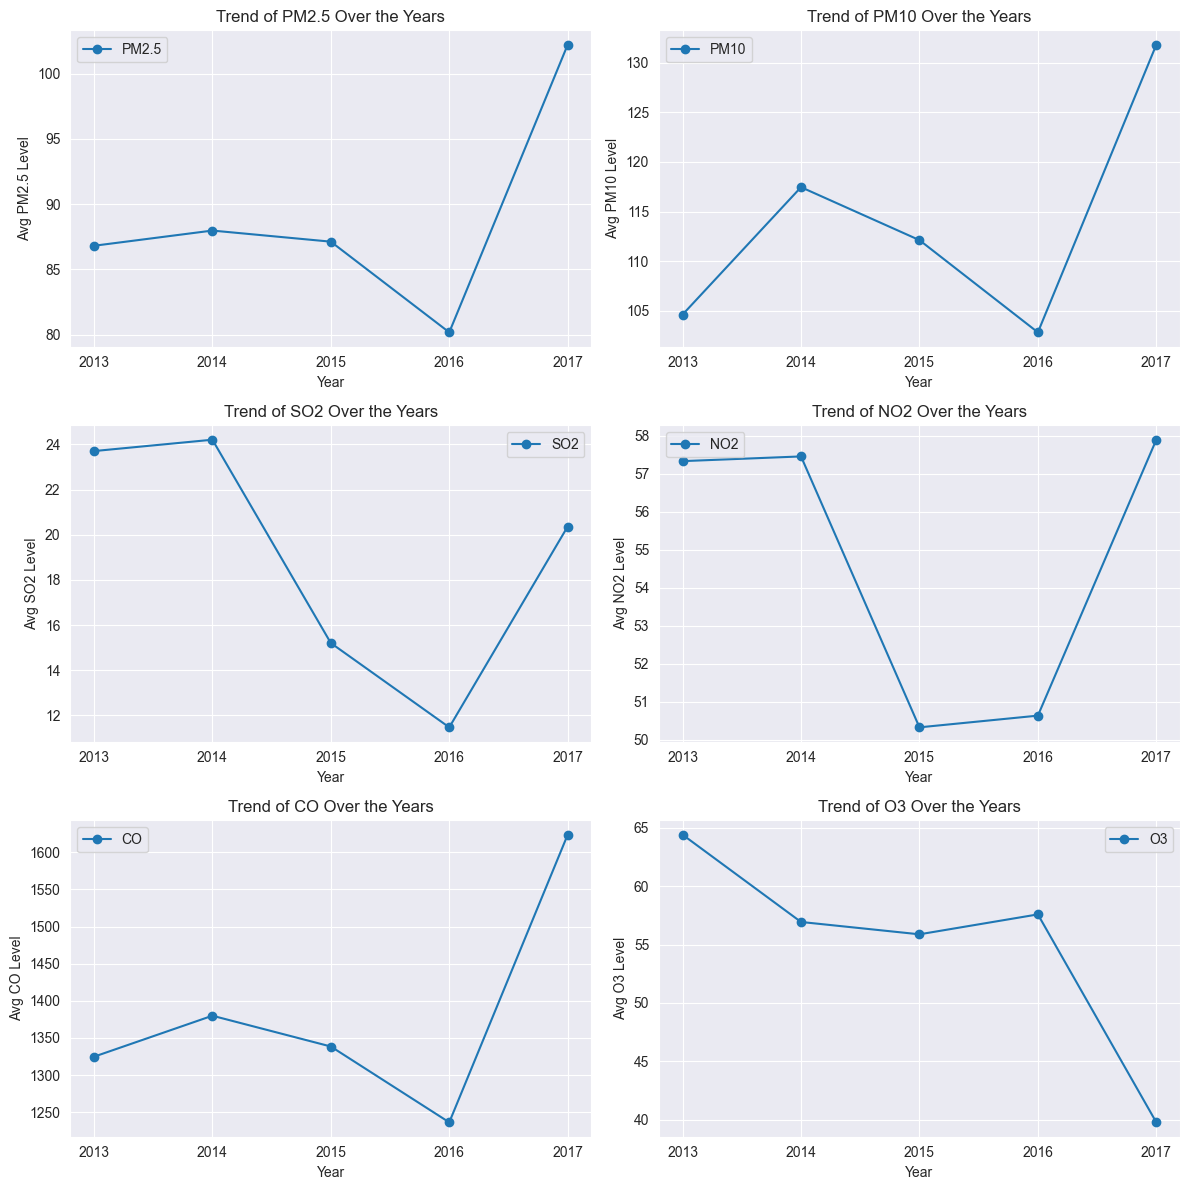

In [101]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

cols = 2  # Dua plot per baris
rows = math.ceil(len(pollutants) / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 4 * rows))

axes = axes.flatten()

for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    ax.plot(pivot_yearly.index, pivot_yearly[pollutant], label=pollutant, marker='o')
    ax.set_xlabel('Year')
    ax.set_ylabel(f'Avg {pollutant} Level')
    ax.set_title(f'Trend of {pollutant} Over the Years')
    ax.legend()
    ax.grid(True)

for i in range(len(pollutants), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


**Insight**


- PM2.5 mengalami penurunan pada 2016 tetapi melonjak signifikan pada 2017.
- PM10 menunjukkan tren serupa dengan PM2.5, turun pada 2016 lalu meningkat tajam pada 2017.
- SO2 mengalami penurunan drastis antara 2014 dan 2016, kemudian naik kembali pada 2017.
- NO2 turun signifikan dari 2014 hingga 2015, lalu perlahan naik dan melonjak pada 2017.
- CO meningkat secara bertahap dan mencapai puncaknya pada 2017.
- O3 mengalami tren penurunan sejak 2013 dengan sedikit fluktuasi di tahun-tahun berikutnya.



### Pertanyaan 2: Bagaimana pengaruh arah angin terhadap penyebaran polutan?

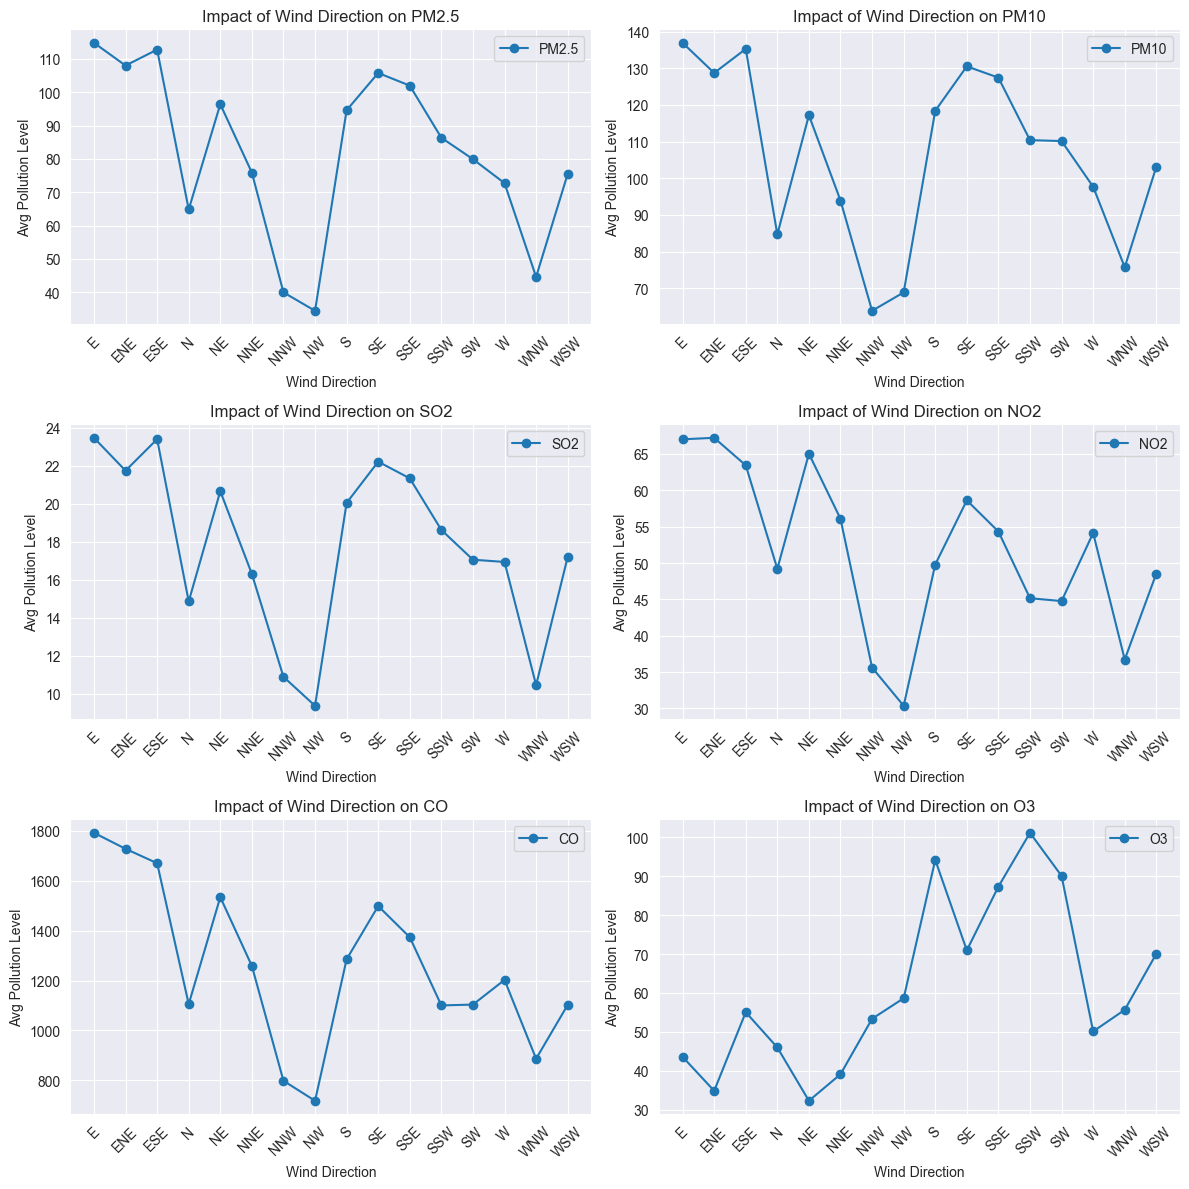

In [102]:
cols = 2  # Dua plot per baris
rows = math.ceil(len(pollutants) / cols)  # Hitung jumlah baris yang dibutuhkan

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 4 * rows))

axes = axes.flatten()

for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    ax.plot(pivot_wind.index, pivot_wind[pollutant], label=pollutant, marker='o')
    ax.set_xlabel('Wind Direction')
    ax.set_ylabel('Avg Pollution Level')
    ax.set_title(f'Impact of Wind Direction on {pollutant}')
    ax.legend()
    ax.grid(True)

    ax.set_xticks(range(len(pivot_wind.index)))
    ax.set_xticklabels(pivot_wind.index, rotation=45)

for i in range(len(pollutants), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



**Insight**
- PM2.5 dan PM10 cenderung tinggi saat angin berasal dari timur dan utara, serta lebih rendah saat angin dari selatan dan barat daya.
- SO2 menunjukkan variasi tinggi saat angin dari timur laut dan menurun signifikan saat angin dari barat daya.
- NO2 memiliki pola fluktuatif dengan puncak saat angin dari timur dan timur laut, serta menurun saat angin dari selatan.
- CO memiliki konsentrasi tertinggi saat angin dari timur dan menurun drastis saat angin dari arah barat daya.
- O3 justru meningkat saat angin dari barat daya dan selatan, menunjukkan pola kebalikan dari polutan lainnya.
- Arah angin memainkan peran penting dalam distribusi polutan, dengan polutan utama lebih terkonsentrasi saat angin berasal dari timur dan utara.

### Pertanyaan 3: Kapan waktu paling aman untuk aktivitas luar ruangan berdasarkan tingkat polusi udara?

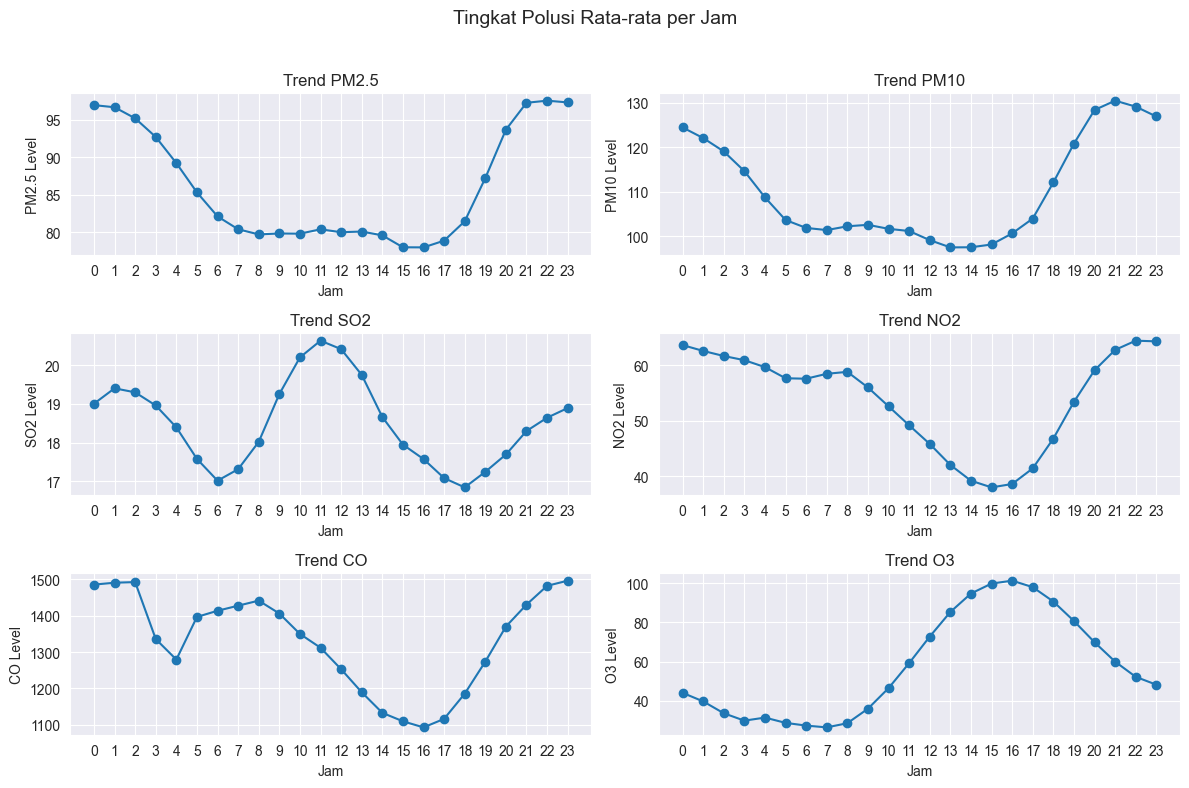

In [103]:
num_pollutants = len(pollutants)

rows = (num_pollutants + 1) // 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
fig.suptitle('Tingkat Polusi Rata-rata per Jam', fontsize=14)

axes = axes.flatten()

for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    ax.plot(pivot_hourly.index, pivot_hourly[pollutant], marker='o', linestyle='-')
    ax.set_xlabel('Jam')
    ax.set_ylabel(f'{pollutant} Level')
    ax.set_title(f'Trend {pollutant}')
    ax.set_xticks(range(24))
    ax.set_xticklabels(range(24))
    ax.grid(True)


if num_pollutants % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Insight**
- PM2.5 dan PM10 menunjukkan tren menurun dari tengah malam hingga siang, lalu meningkat kembali di malam hari.
- SO2 mengalami fluktuasi dengan puncak sekitar pukul 10-12 siang dan titik terendah pada sore hari.
- NO2 cenderung menurun hingga sore hari, lalu meningkat kembali setelah pukul 18.00.
- CO memiliki pola serupa dengan PM2.5 dan PM10, dengan tingkat tertinggi di malam hari dan terendah di sore hari.
- O3 meningkat dari pagi hingga sore hari, lalu menurun kembali pada malam hari.
- Pola ini menunjukkan bahwa polutan cenderung tinggi pada malam hingga dini hari, sedangkan O3 lebih tinggi di siang hingga sore hari.

### Pertanyaa 4: Bagaimana pengaruh curah hujan terhadap tingkat polusi udara?

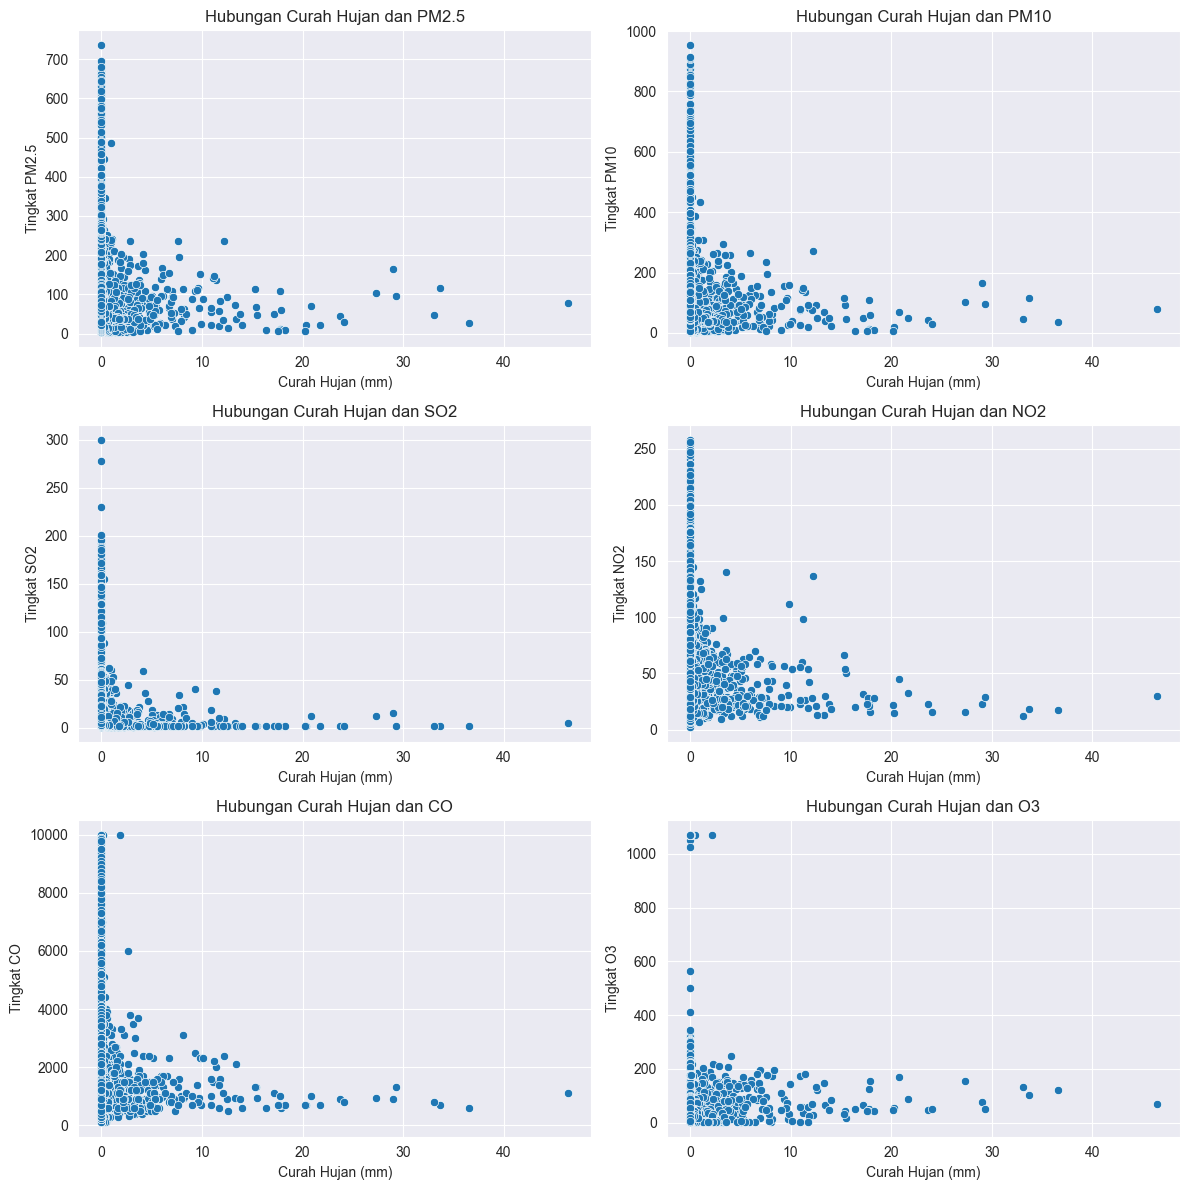

In [104]:
fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
axes = axes.flatten()

for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    sns.scatterplot(data=df, x='RAIN', y=pollutant, ax=ax)
    ax.set_xlabel('Curah Hujan (mm)')
    ax.set_ylabel(f'Tingkat {pollutant}')
    ax.set_title(f'Hubungan Curah Hujan dan {pollutant}')
    ax.grid(True)

for j in range(len(pollutants), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Insight:**
- Curah hujan berbanding terbalik dengan tingkat polusi udara, di mana semakin tinggi curah hujan, polutan cenderung menurun.
- Partikel PM2.5 dan PM10 mengalami penurunan signifikan karena terbawa air hujan dan mengendap ke permukaan.
- Curah hujan rendah (0-5 mm) kurang efektif dalam mengurangi polusi udara secara signifikan.
- Gas polutan seperti CO dan NO2 juga menurun karena hujan membantu melarutkannya di udara.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Tren polusi dari tahun 2013 hingga 2017 menunjukkan fluktuasi, dengan sebagian besar polutan mengalami penurunan pada 2015-2016, tetapi kembali meningkat tajam pada 2017, menunjukkan adanya faktor eksternal yang berpengaruh, seperti perubahan kebijakan, aktivitas industri, atau kondisi lingkungan tertentu.
- Conclution pertanyaan 2 : Tren polusi dari tahun 2013 hingga 2017 menunjukkan fluktuasi, dengan sebagian besar polutan mengalami penurunan pada 2015-2016, tetapi kembali meningkat tajam pada 2017, menunjukkan adanya faktor eksternal yang berpengaruh, seperti perubahan kebijakan, aktivitas industri, atau kondisi lingkungan tertentu.
- Conclution pertanyaan 3 : Waktu paling aman untuk aktivitas luar ruangan adalah saat tingkat polusi berada pada level terendah yaitu sekitar jam 06 hingga jam 10 siang, di atas jam 12 siang Ozon cenderung meningkat.
- Conclution pertanyaan 4 : Curah hujan memiliki dampak positif dalam menurunkan kadar polusi udara, terutama untuk polutan berbentuk partikel seperti PM2.5 dan PM10, yang cenderung berkurang setelah periode hujan tinggi.